In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

importer les données

In [90]:
data=pd.read_csv("~/Téléchargements/fifa21_raw_data.csv",sep=',')

/tmp/ipykernel_8193/1942393467.py:1: DtypeWarning: Columns (76) have mixed types. Specify dtype option on import or set low_memory=False.
  data=pd.read_csv("~/Téléchargements/fifa21_raw_data.csv",sep=',')


In [91]:
data.head()

,photoUrl,LongName,playerUrl,Nationality,Positions,Name,Age,↓OVA,POT,Team & Contract,...,A/W,D/W,IR,PAC,SHO,PAS,DRI,DEF,PHY,Hits
0,https://cdn.sofifa.com/players/158/023/21_60.png,Lionel Messi,http://sofifa.com/player/158023/lionel-messi/2...,Argentina,RW ST CF,L. Messi,33,93,93,\n\n\n\nFC Barcelona\n2004 ~ 2021\n\n,...,Medium,Low,5 ★,85,92,91,95,38,65,\n372
1,https://cdn.sofifa.com/players/020/801/21_60.png,C. Ronaldo dos Santos Aveiro,http://sofifa.com/player/20801/c-ronaldo-dos-s...,Portugal,ST LW,Cristiano Ronaldo,35,92,92,\n\n\n\nJuventus\n2018 ~ 2022\n\n,...,High,Low,5 ★,89,93,81,89,35,77,\n344
2,https://cdn.sofifa.com/players/200/389/21_60.png,Jan Oblak,http://sofifa.com/player/200389/jan-oblak/210005/,Slovenia,GK,J. Oblak,27,91,93,\n\n\n\nAtlético Madrid\n2014 ~ 2023\n\n,...,Medium,Medium,3 ★,87,92,78,90,52,90,\n86
3,https://cdn.sofifa.com/players/192/985/21_60.png,Kevin De Bruyne,http://sofifa.com/player/192985/kevin-de-bruyn...,Belgium,CAM CM,K. De Bruyne,29,91,91,\n\n\n\nManchester City\n2015 ~ 2023\n\n,...,High,High,4 ★,76,86,93,88,64,78,\n163
4,https://cdn.sofifa.com/players/190/871/21_60.png,Neymar da Silva Santos Jr.,http://sofifa.com/player/190871/neymar-da-silv...,Brazil,LW CAM,Neymar Jr,28,91,91,\n\n\n\nParis Saint-Germain\n2017 ~ 2022\n\n,...,High,Medium,5 ★,91,85,86,94,36,59,\n273


In [92]:
#analyse des différentes colonnes et leur type
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18979 entries, 0 to 18978
Data columns (total 77 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   photoUrl          18979 non-null  object
 1   LongName          18979 non-null  object
 2   playerUrl         18979 non-null  object
 3   Nationality       18979 non-null  object
 4   Positions         18979 non-null  object
 5   Name              18979 non-null  object
 6   Age               18979 non-null  int64 
 7   ↓OVA              18979 non-null  int64 
 8   POT               18979 non-null  int64 
 9   Team & Contract   18979 non-null  object
 10  ID                18979 non-null  int64 
 11  Height            18979 non-null  object
 12  Weight            18979 non-null  object
 13  foot              18979 non-null  object
 14  BOV               18979 non-null  int64 
 15  BP                18979 non-null  object
 16  Growth            18979 non-null  int64 
 17  Joined      

In [93]:
#compte le nombre de doublons
data.duplicated().sum()

1

In [94]:
#on supprime les doublons
data.drop_duplicates(inplace=True)

In [95]:
#on vérifie que les doublons ont bien été supprimés
data.duplicated().sum()

0

In [96]:
#on compte les valeurs NaN dans toutes les colonnes du dataset
data.isna().sum().sort_values(ascending=False)

Loan Date End       17965
photoUrl                0
GK Diving               0
Sliding Tackle          0
Standing Tackle         0
                    ...  
Heading Accuracy        0
Finishing               0
Crossing                0
Attacking               0
Hits                    0
Length: 77, dtype: int64

La colonne Loan Date End représente la fin de prêt des joueurs on peut donc remplacé NaN par non spécifié

In [97]:
#on remplace les NaN
data.fillna("non spécifié",inplace=True)

In [98]:
#on renomme les colonnes dont les noms présentent des espaces

column_renamed = {
    "photoUrl": "Photo_Url",
    "LongName": "Long_Name",
    "playerUrl": "player_Url",
    "↓OVA": "OVA",
    "Loan Date End": "Loan_Date_End",
    "Release Clause": "Release_Clause",
    "Heading Accuracy": "Heading_Accuracy",
    "Short Passing": "Short_Passing",
    "FK Accuracy": "FK_Accuracy",
    "Long Passing": "Long_Passing",
    "Ball Control": "Ball_Control",
    "Sprint Speed": "Sprint_Speed",
    "Shot Power": "Shot_Power",
    "Long Shots": "Long_Shots",
    "Standing Tackle": "Standing_Tackle",
    "Sliding Tackle": "Sliding_Tackle",
    "GK Diving": "GK_Diving",
    "GK Handling": "GK_Handling",
    "GK Kicking": "GK_Kicking",
    "GK Positioning": "GK_Positioning",
    "GK Reflexes": "GK_Reflexes",
    "Total Stats": "Total_Stats",
    "Base Stats": "Base_Stats",
    "Team & Contract": "Team_and_Contract"

}

data=data.rename(columns=column_renamed)

In [99]:
#on vérifie le changement de nom des colonnes
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18978 entries, 0 to 18978
Data columns (total 77 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Photo_Url          18978 non-null  object
 1   Long_Name          18978 non-null  object
 2   player_Url         18978 non-null  object
 3   Nationality        18978 non-null  object
 4   Positions          18978 non-null  object
 5   Name               18978 non-null  object
 6   Age                18978 non-null  int64 
 7   OVA                18978 non-null  int64 
 8   POT                18978 non-null  int64 
 9   Team_and_Contract  18978 non-null  object
 10  ID                 18978 non-null  int64 
 11  Height             18978 non-null  object
 12  Weight             18978 non-null  object
 13  foot               18978 non-null  object
 14  BOV                18978 non-null  int64 
 15  BP                 18978 non-null  object
 16  Growth             18978 non-null  int64

In [100]:
data["Team_and_Contract"]

0                    \n\n\n\nFC Barcelona\n2004 ~ 2021\n\n
1                        \n\n\n\nJuventus\n2018 ~ 2022\n\n
2                 \n\n\n\nAtlético Madrid\n2014 ~ 2023\n\n
3                 \n\n\n\nManchester City\n2015 ~ 2023\n\n
4             \n\n\n\nParis Saint-Germain\n2017 ~ 2022\n\n
                               ...                        
18974    \n\n\n\nChongqing Dangdai Lifan FC SWM Team\n2...
18975             \n\n\n\nOldham Athletic\n2020 ~ 2021\n\n
18976                  \n\n\n\nWuhan Zall\n2018 ~ 2022\n\n
18977             \n\n\n\nOldham Athletic\n2020 ~ 2021\n\n
18978                \n\n\n\nClub Bolívar\n2020 ~ 2024\n\n
Name: Team_and_Contract, Length: 18978, dtype: object

In [101]:
#on va retirer les \n et séparer l'equipe du contrat
data["team"] = data["Team_and_Contract"].str.extract(r'(\n\n\n\n.*\n)', expand=False).str.strip()
data["contract"] = data["Team_and_Contract"].str.findall(r'[\d~ ]+').str[-1]


#on récupère la date de début de contrat et la date de fin de contrat
data["contract_start"] = data["contract"].str.slice(0, 4)
data["contract_end"] = data["contract"].str.slice(-4)

#on convertit les dates en entiers
data["contract_start"] = pd.to_numeric(data["contract_start"], errors="coerce").fillna(0).astype(int)
data["contract_end"] = pd.to_numeric(data["contract_end"], errors="coerce").fillna(0).astype(int)


In [102]:
#on retire les anciennes colonnes et colonnes intermédiaires
data=data.drop("Team_and_Contract", axis=1)
data=data.drop("contract",axis=1)

In [103]:
#Défini une fonction qui convertit la taille en pieds en centimètres
"""
Converts a height string in feet and inches to centimeters.
Args:
    height_str: The height string in the format "feet'inches".
Returns:
    The height in centimeters.
"""
def convert_height_to_cm(height_str):
    feet, inches = height_str.split("'")
    feet = int(feet)
    inches = int(inches.replace('"', ''))
    total_feet = feet + (inches * 0.08)
    return total_feet * 30.48

# on convertit les tailles de pieds à centimètre pour toute notre colonne Height
data["Height_cm"] = data["Height"].apply(convert_height_to_cm).astype(int)


data["Height_cm"]

0        169
1        187
2        187
3        179
4        174
        ... 
18974    176
18975    169
18976    176
18977    174
18978    174
Name: Height_cm, Length: 18978, dtype: int64

In [104]:
# retire le 'lbs' et convertit en entier
data["Weight"] = data["Weight"].str.replace("lbs", "", regex=False).astype(int)



In [105]:
#convertir le poids en lbs en kg
def convert_lbs_to_kg(weight_lbs):
    """
    Convertit le poids en livres (lbs) en kilogrammes (kg) 

    Paramètres :
    - weight : le poids en lbs

    Retour :
    - weight_kg le poids en kg
    """
    weight=int(weight_lbs)
    weight_kg = weight * 0.453592

    return weight_kg

data["Weight_kg"] = data["Weight"].apply(convert_lbs_to_kg).astype(int)


In [106]:
data["Weight_kg"]

0        72
1        83
2        87
3        69
4        68
         ..
18974    69
18975    58
18976    66
18977    64
18978    68
Name: Weight_kg, Length: 18978, dtype: int64

In [107]:
data[["Value", "Wage", "Release_Clause"]]




,Value,Wage,Release_Clause
0,€67.5M,€560K,€138.4M
1,€46M,€220K,€75.9M
2,€75M,€125K,€159.4M
3,€87M,€370K,€161M
4,€90M,€270K,€166.5M
...,...,...,...
18974,€35K,€1K,€57K
18975,€60K,€500,€165K
18976,€40K,€1K,€70K
18977,€60K,€500,€165K


In [108]:
for col in ["Value", "Wage", "Release_Clause"]:
    # Enlève le symbole €
    data[col] = data[col].str.replace("€", "", regex=False)

    # Convertit les valeurs contenant "M"
    data[col] = data[col].str.replace("M", "e6", regex=False)

    # Convertit les valeurs contenant "K"
    data[col] = data[col].str.replace("K", "e3", regex=False)

    # Convertit tout en nombres (float), 'errors=coerce' transforme les valeurs invalides en NaN
    data[col] = pd.to_numeric(data[col], errors='coerce')

    # on convertit en entier
    data[col] = data[col].astype("Int64")

 


In [109]:
#renommer les colonnes

# Rename columns
data = data.rename(columns={"Value": "Value_eur", "Wage": "Wage_eur", "Release_Clause": "Release_Clause_eur"})


In [111]:
data[["W/F", "SM", "IR"]]

,W/F,SM,IR
0,4 ★,4★,5 ★
1,4 ★,5★,5 ★
2,3 ★,1★,3 ★
3,5 ★,4★,4 ★
4,5 ★,5★,5 ★
...,...,...,...
18974,2 ★,2★,1 ★
18975,2 ★,2★,1 ★
18976,2 ★,2★,1 ★
18977,2 ★,2★,1 ★


In [113]:
#on retire les signes "★" et convertit la chaine de caractère en entier
for col in ["W/F", "SM", "IR"]:
    data[col]=data[col].str.replace("★","", regex=False).astype(int)

In [114]:
data[["W/F", "SM", "IR"]]

,W/F,SM,IR
0,4,4,5
1,4,5,5
2,3,1,3
3,5,4,4
4,5,5,5
...,...,...,...
18974,2,2,1
18975,2,2,1
18976,2,2,1
18977,2,2,1


In [118]:
data["Hits"].head(5)


0    \n372
1    \n344
2     \n86
3    \n163
4    \n273
Name: Hits, dtype: object

In [119]:
#on retire les retours à la ligne \n présents dans la chaine de caractère
data["Hits"]=data["Hits"].str.replace("\n","", regex=False)

In [120]:
#on calcule le nombre de valeurs nulles
data["Hits"].isnull().sum()

2595

In [121]:
#on prends 30 valeurs au hasard pour voir les differents types de valeur
data["Hits"].sample(30)

15526      3
303      127
3846      17
12813      2
14859      2
5311       2
3083      10
11428      2
4927       8
5918       2
5419       4
2262      16
13873      4
17324    NaN
15585      4
12177      1
4124       3
5623      56
12471      2
12966      1
4412       5
11640      3
15968      1
8877       4
11557      1
18517    NaN
5703      12
10408      2
15635      3
7598       1
Name: Hits, dtype: object

In [123]:
#on remplace les valeurs contenant des K en multipliant par 1000 et on convertit les chaines de caractères en entiers
data.loc[data["Hits"].str.contains("K", na=False), "Hits"] = pd.to_numeric(data.loc[data["Hits"].str.contains("K", na=False), "Hits"].str.replace("K", "", regex=False)) * 1000
# On remplace les valeurs manquantes par 0
data["hits"] = data["Hits"].fillna(0).astype(int)



In [125]:
#suit le formalisme précédent sur les noms de colonne
column_foot= {"foot": "Foot" }
data=data.rename(columns=column_foot)

Data visualisation 

In [128]:
import matplotlib.pyplot as plt

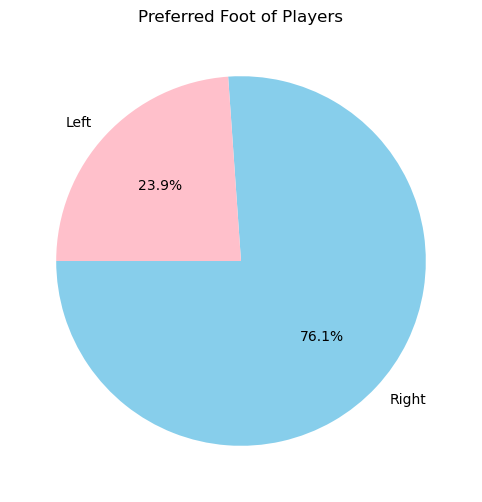

In [130]:
#calcule la part des joueurs gauchers et droitiers du pied
prefered_foot=data["Foot"].value_counts()
plt.figure(figsize=(8, 6))
plt.pie(prefered_foot, labels=prefered_foot.index, autopct='%1.1f%%', colors=["skyblue", "pink"], startangle=180)
plt.title("Preferred Foot of Players")
plt.show()

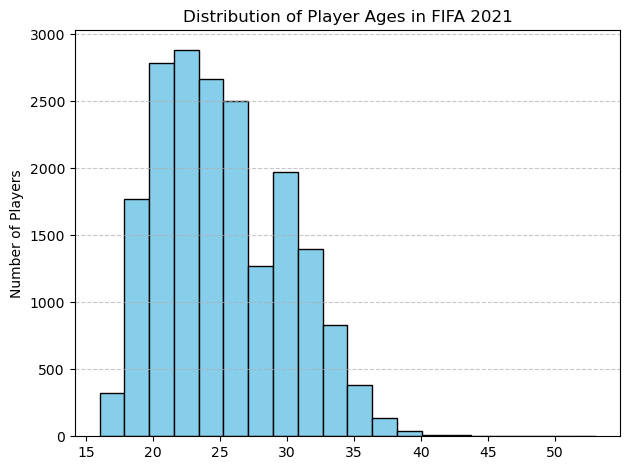

In [132]:
plt.hist(data["Age"], bins=20, color="skyblue",edgecolor="black")
plt.xlabel="Age"
plt.ylabel("Number of Players")
plt.title("Distribution of Player Ages in FIFA 2021")
plt.grid(axis="y", linestyle="--", alpha=0.7)  # Add vertical gridlines with adjusted transparency
plt.tight_layout()

# Display the plot
plt.show()

In [143]:
#Allons voir les pays comprenant le plus de joueur 5 etoiles

data[["DRI","SHO","PAS","PHY","PAC"]]

,DRI,SHO,PAS,PHY,PAC
0,95,92,91,65,85
1,89,93,81,77,89
2,90,92,78,90,87
3,88,86,93,78,76
4,94,85,86,59,91
...,...,...,...,...,...
18974,27,23,26,48,58
18975,53,46,40,40,70
18976,38,28,26,51,64
18977,49,40,48,45,64


In [147]:
#données sur les caractéristiques offensives des joueurs et leur nationalité
data_stats=data[["DRI","SHO","PAS","PHY","PAC","Nationality"]]

In [148]:
data_stats

,DRI,SHO,PAS,PHY,PAC,Nationality
0,95,92,91,65,85,Argentina
1,89,93,81,77,89,Portugal
2,90,92,78,90,87,Slovenia
3,88,86,93,78,76,Belgium
4,94,85,86,59,91,Brazil
...,...,...,...,...,...,...
18974,27,23,26,48,58,China PR
18975,53,46,40,40,70,England
18976,38,28,26,51,64,China PR
18977,49,40,48,45,64,England


In [155]:
#calcule le score moyen des compétences des joueurs lignes par lignes
data_stats["score"]=data_stats[["DRI","SHO","PAS","PHY","PAC"]].mean(axis=1)

/tmp/ipykernel_8193/456974828.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_stats["score"]=data_stats[["DRI","SHO","PAS","PHY","PAC"]].mean(axis=1)


In [156]:
data_stats["score"]

0        85.6
1        85.8
2        87.4
3        84.2
4        83.0
         ... 
18974    36.4
18975    49.8
18976    41.4
18977    49.2
18978    45.8
Name: score, Length: 18978, dtype: float64

In [163]:
#donne les 10 nationalités avec les meilleurs joueurs en moyenne
country_score=data_stats.groupby("Nationality")["score"].mean().sort_values(ascending=False).head(10)

In [164]:
country_score

Nationality
Chad                   74.800000
Tanzania               73.200000
Iraq                   69.700000
Bermuda                68.800000
São Tomé & Príncipe    68.400000
Namibia                66.933333
Armenia                66.800000
Egypt                  66.740000
Syria                  66.650000
Thailand               66.300000
Name: score, dtype: float64

In [167]:
#donne les 10 pays possédant la plus forte moyenne de leur 10 meilleurs joueurs
data_sorted=data_stats.sort_values(["Nationality","score"], ascending=[True,False])
top10_by_country=data_sorted.groupby("Nationality").head(10)
top10=top10_by_country.groupby("Nationality")["score"].mean()
top_countries=top10.sort_values(ascending=False).head(10)
print(top_countries)

Nationality
Germany        82.24
Brazil         82.12
France         81.82
Argentina      81.46
Spain          81.18
Belgium        80.72
Portugal       80.00
England        79.98
Italy          79.46
Netherlands    78.90
Name: score, dtype: float64
